# Convolutional Neural Networks

CNN's are the most practical way to make visual-based neural networks. They also work well for other non-visual tasks such as  NLP and voice recognition, but for now we will just focus on the visual aspects.

The idea of convolutional networks is based on how the human visual cortex works. Many neuroms in the visual cortext "have a small *local receptive field*, meaning they react only to visual stimuli located in a limited region of the visual field." The neurons also work hierarchaly just like a regualar perceptron, and lower neurons will detect lines and edges of specific relations and the high level neurons will detect more complex shapes and patterns.

### Convolutional Layer

"Neurons in the first convolutional layer are not connected to every single pixel in the input image (like they were in previous chapters), but only to pixels in their receptive fields. In turn each neuron in the second convolutional layer is connected only to neurons located within a small rectangle in the first layer."

This process of creating partially connected layers is much better than Dense networks since it significantly reduces the exploding exponentiation of connections.

"Until now, all multilayer neural networks we looked at had layers composed of a long line of neurons, and we had to flatten input images to 1D before feeding them to the neural network. Now each layer is represented in 2D, which makes it easier to match neurons with their corresponding inputs."

We can change the size of the fields and also the *stride* or the jumps between each receptive fields. It is definitely possible that the receptive fields are too large at the edges that they don't fit entirely on the image. This is obviously true when the layers are the same size and shape. To remedy this, we can use padding, such as surrounding the border of the image with 0's or the same as the original border so that we have more room.

### Filters

Since we now have 2-dimensional layers, we can consider a layer's weights as a grayscale image. We can consider several pre-built *filters* or *convolution kernels*, for example a horizontal filter, which is a 7x7 matrix with 0's everywhere except for a horizontal line of 1's in the middle. Another possible filter is the vertical filter, which you can imagine is similar but the 1's make a vertical line.

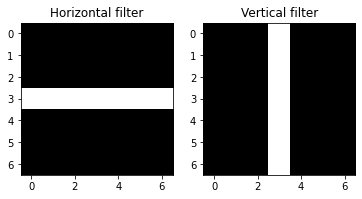

In [5]:
import numpy as np
import matplotlib.pyplot as plt
hor = np.zeros((7,7))
hor[3] = np.ones(7)
vert = np.zeros((7,7))
vert[:,3] = 7
plt.subplot(121)
plt.title('Horizontal filter')
plt.imshow(hor, cmap=plt.cm.gray)
plt.subplot(122)
plt.title('Vertical filter')
plt.imshow(vert, cmap=plt.cm.gray)
plt.show()

If we have a layer that has all its neurons using the vertical filter, and we fed an image into it, all the vertical lines in the image will enhance all the vertical lines while blurring out the rest of the image. "Thus, a layer full of neurons using the same filter gives you a *feature map*, wich highlights the areas in an image that are most similar to the filter. During training, a CNN finds the most useful filters for its task and it learns to combine them into more complex patterns."

### Stacking Multiple Feature Maps

"Up to now, for simplicity, we have represented each convolutional layer as a thin 2D layer, but in reality it is composed of several feature maps of equal sizes, so it is more accurately represented in 3D. Within one feature map, all neurons share the same parameters (weights and bias term) [which is its filter] but different feature maps may have different parameters."

"The fact that all neurons in a feature map share the same paramter dramatically reduces the number of parameters in the model, but most importantly it means that once the CNN has learned to recognize a pattern in one location, it can recognize it in any other location. In contrast, once a regular DNN has learned to recognize a pattern in one location, it can recognize it only in that particular location."

"Specifically, a neuron located in row i, column j of jthe feature map k in a given convolutional layer l is connected to the output of the neurons in the previous layer l-1 located in rows i x stride_h to i x stride_h + f_h - 1 and columns j x stride_w to j x stride_w + f_w - 1 across all feature maps in layer l-1."

### Memory Requirements

One issue with CNNs is that all the intermediate values that are computed during the forward pass need to be held in memory for the backpropogation pass.

Now let's look at the second common building block of CNNs: the *pooling layer*.

### Pooling Layer

Pooling layers are actually really simple. They work very similar in that each neuron has a receptive field that it is connected to in the next layer, and you can adjust these with the size, stride and controlling the padding, but the neuron actually has no weights at all. Instead, it simply works as an aggregate function. It will either find the maximum value of each value in the receptive field, or it will find the average value of each value in the receptive field.

Pooling layers are useful in subsampling or shrinking "the input image in order to reduce the computational load, the memory usage, and the number of parameters (thereby limiting the risk of overfitting)."

### CNN Architectures

Usually, CNN architectures are structured as having a few Convolution layers stacked on top of each other with a ReLU activation and with pooling layers in between. "The image gets smaller and smaller as it progresses through the network, but it also typically gets deeper and deeper (i.e., with more feature maps) thanks to the convolutional layers. Then once the image is small enough and you have enough feature maps, you can then add a few fully connected layers and a final layer to output a regression or classification depending on your task.

However, very powerful alternate CNN architectures have come about in recent years that use very different approaches. We will summarize and try to implement (sometimes simplified) versions of the same architectures in Keras.

#### LeNet-5

"The LeNet-5 architecture is perhaps the most widely known CNN architecture. As mentioned earlier, it was created by Yann LeCun in 1998 and widely used for hand-written digit recognition (MNIST)."

| Layer | Type            | Maps | Size  | Kernel size | Stride | Activation |
|-------|-----------------|------|-------|-------------|--------|------------|
| Out   | Fully Connected | -    | 10    | -           | -      | RBF        |
| F6    | Fully Connected | -    | 84    | -           | -      | tanh       |
| C5    | Convolution     | 120  | 1x1   | 5x5         | 1      | tanh       |
| S4    | Avg Pooling     | 16   | 5x5   | 2x2         | 2      | tanh       |
| C3    | Convolution     | 16   | 10x10 | 5x5         | 1      | tanh       |
| S2    | Average Pooling | 6    | 14x14 | 2x2         | 2      | tanh       |
| C1    | Convolution     | 6    | 28x28 | 5x5         | 1      | tanh       |
| In    | Input           | 1    | 32x32 | -           | -      | -          |

"There are a few extra details to be noted:

- MNIST images are 28x28 pixels, but they are zero-padded to 32x32 pixels and normalized before being fed to the network. The rest of the network does not use any padding, which is why the size keeps shrinking as the image progresses through the network.

- The average pooling layers are slightly more complex than usual: each neuron computes the mean of its inputs, then multiplies the result by a learnable coefficient (one per map) and adds a learnable bias term (again, one per map), then finally applies the activation function.

- Most neurons in C3 maps are connected to neurons in only three or four S2 maps (instead of all six S2 maps). [Note: I don't know too much about that and I don't want to spend hours on this one network, so we will just disregard that.]

- The output layer is a bit special: instead of computing the matrix multiplication of the inputs and the weight vector, each neuron outputs the square of the Euclidean distance between its input vector and its weight vector. Each output measures how much the image belongs to a particular digit class. The cross entropy cost function is now preferred, as it penalizes bad predictions much more, producing larger gradients and thus converging faster."

In [6]:
import tensorflow as tf

In [57]:
# first we need to define this slightly modified average pooling layer ourselves

class AvgPooling2D_Linear(tf.keras.layers.AveragePooling2D):
    
    def __init__(self, input_dim=6, *args, **kwargs):
        super(AvgPooling2D_Linear, self).__init__(*args, **kwargs)
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(initial_value=w_init(shape=(input_dim,), dtype='float32'), trainable=True, name='avgpooling2d_w')
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(initial_value=b_init(shape=(input_dim,), dtype='float32'), trainable=True, name='avgpooling2d_b')
    def _compute_gradients(tensor, var_list):
        grads = tf.gradients(tensor, var_list)
        return [grad if grad is not None else tf.zeros_like(var) for var, grad in zip(var_list, grads)]

In [38]:
# also we need to define the modified output layer

class Alternate_Output(tf.keras.layers.Layer):
    def __init__(self, units=32, inputs_dim=32):
        super(Alternate_Output, self).__init__()
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(initial_value=w_init(shape=(inputs_dim, units),
                                                  dtype='float32'), trainable=True)
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(initial_value=b_init(shape=(units,),
                                                  dtype='float32'),  trainable=True)
    def call(self, inputs):
        return tf.abs(tf.math.subtract(inputs,self.w)) # I don't understand how I can find the Euclidean distance
                                                        # with 84 inputs and 10 weights??? Whatever, I'll just use a regular dense layer for now

In [67]:
inputs = tf.keras.layers.Input((28,28,1))
zero_pad = tf.keras.layers.ZeroPadding2D(padding=(2,2))(inputs)
c1 = tf.keras.layers.Conv2D(6, (5,5), strides=1, activation='tanh')(zero_pad)
s2 = tf.keras.layers.AveragePooling2D(2, strides=2)(c1)
r1 = tf.keras.layers.ReLU()(s2)
c3 = tf.keras.layers.Conv2D(16, (5,5), strides=1, activation='tanh')(r1)
s4 = tf.keras.layers.AveragePooling2D(2, strides=2)(c3)
r2 = tf.keras.layers.ReLU()(s4)
c5 = tf.keras.layers.Conv2D(120, (5,5), strides=1, activation='tanh')(r2)
f6 = tf.keras.layers.Dense(84, activation='tanh')(c5)
outputs = tf.keras.layers.Dense(10, activation='softmax')(f6)
leNet = tf.keras.models.Model(inputs=[inputs], outputs=[outputs])

In [68]:
leNet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [69]:
leNet.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
zero_padding2d_24 (ZeroPaddi (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_6 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
re_lu_7 (ReLU)               (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 5, 5, 16)          0   

In [70]:
# Loading in MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255., x_test / 255.
x_train.reshape((-1,28,28,1))
x_test.reshape((-1,28,28,1))

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [71]:
leNet.fit(x_train, y_train, epochs=15, validation_data=[x_test, y_test])

Epoch 1/15
1875/1875 [==============================] - 48s 25ms/step - loss: 0.2123 - accuracy: 0.1261 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/15
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0815 - accuracy: 0.1272 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/15
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0647 - accuracy: 0.1278 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/15
 854/1875 [============>.................] - ETA: 29s - loss: 0.0532 - accuracy: 0.1289

KeyboardInterrupt: 

#### AlexNet

AlexNet "is quite similar to LeNet-5, only much larger and deeper, and it was the first to stack convolutional layers directly on top of each other, instead of stacking a pooling layer on top of each convolutional layer."

In [3]:
import tensorflow as tf

im_input = tf.keras.layers.Input((227,227,3))
c1 = tf.keras.layers.Conv2D(96, 11, strides=4, padding='VALID', activation='relu')(im_input)
s2 = tf.keras.layers.MaxPool2D(3,strides=4,padding='VALID')(c1)
c3 = tf.keras.layers.Conv2D(256, 5, strides=1, padding='SAME', activation='relu')(s2)
s4 = tf.keras.layers.MaxPool2D(3,strides=2,padding='VALID')(c3)
c5 = tf.keras.layers.Conv2D(384, 3, strides=1, padding='SAME', activation='relu')(s4)
c6 = tf.keras.layers.Conv2D(384, 3, strides=1, padding='SAME', activation='relu')(c5)
c7 = tf.keras.layers.Conv2D(256, 3, strides=1, padding='SAME', activation='relu')(c6)
f8 = tf.keras.layers.Dense(4096, activation='relu')(c7)
f9 = tf.keras.layers.Dense(4096, activation='relu')(f8)
output_softmax = tf.keras.layers.Dense(1000, activation='softmax')(f9)

alexNet = tf.keras.models.Model(inputs=[im_input], outputs=[output_softmax])
alexNet.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
alexNet.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 256)       614656    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 6, 384)         885120    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 6, 6, 384)         132748

I could keep going with these architectures but they get insanely deep and complex, and I don't have to build them myself normally, so I'll just move past it for now.